In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [4]:
df.shape

(27481, 4)

In [7]:
df.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [6]:
df = df.dropna()

In [8]:
# Import the necessary libraries
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required resources from NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define the pre-processing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join the words back into a string
    text = ' '.join(words)
    
    return text
df["clean_data"] = df["text"].apply(preprocess_text)

[nltk_data] Downloading package punkt to /Users/devansh/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/devansh/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /Users/devansh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
df

,textID,text,selected_text,sentiment,clean_data
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,id responded going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad miss san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,bos bullying
3,9642c003ef,what interview! leave me alone,leave me alone,negative,interview leave alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,son couldnt put release already bought
...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,wish could come see u denver husband lost job ...
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,ive wondered rake client made clear net dont f...
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,yay good enjoy break probably need hectic week...
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,worth


/Users/devansh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


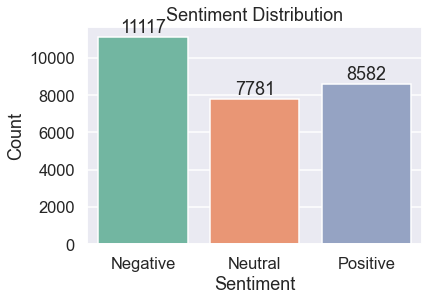

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and context of the plot
sns.set_style("darkgrid")
sns.set_context("talk")

# Create the plot
ax = sns.countplot(df["sentiment"], palette="Set2")

# Set the title and labels
ax.set_title("Sentiment Distribution")
ax.set_xlabel("Sentiment")
ax.set_ylabel("Count")

# Customize the tick labels
ax.set_xticklabels(["Negative", "Neutral", "Positive"])

# Add annotations to the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()


In [11]:
# Import the necessary libraries
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.util import mark_negation

# Download required resources from NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Define the pre-processing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Replace contractions with their full forms
    contractions_dict = {
        "ain't": "am not",
        "aren't": "are not",
        "can't": "cannot",
        "can't've": "cannot have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'd've": "he would have",
        "he'll": "he will",
        "he's": "he is",
        "how'd": "how did",
        "how'll": "how will",
        "how's": "how is",
        "I'd": "I would",
        "I'll": "I will",
        "I'm": "I am",
        "I've": "I have",
        "isn't": "is not",
        "it'd": "it would",
        "it'll": "it will",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "must've": "must have",
        "mustn't": "must not",
        "needn't": "need not",
        "oughtn't": "ought not",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "she'd": "she would",
        "she'll": "she will",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "that'd": "that would",
        "that's": "that is",
        "there'd": "there would",
        "there's": "there is",
        "they'd": "they would",
        "they'll": "they will",
        "they're": "they are",
        "they've": "they have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'll": "we will",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "where's": "where is",
        "who'll": "who will",
        "who's": "who is",
        "won't": "will not",
        "would've": "would have",
        "wouldn't": "would not",
        "you'd": "you would",
        "you'll": "you will",
        "you're": "you are",
        "you've": "you have"}
    
    for contraction, expansion in contractions_dict.items():
        text = text.replace(contraction, expansion)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Tokenize the text into words
    words = nltk.word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatize the words using WordNet
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Mark negations
    words = mark_negation(words)

    # Join the words back into a string
    text = ' '.join(words)

    return text


df["clean_data2"] = df["text"].apply(preprocess_text)



[nltk_data] Downloading package punkt to /Users/devansh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/devansh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/devansh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/devansh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
df.sample(10)

,textID,text,selected_text,sentiment,clean_data,clean_data2
25981,5f3bde3bf7,<i>Waiting For Natie to come online I miss him,I miss him,negative,iwaiting natie come online miss,iwaiting natie come online miss
7575,4375ecbb93,just gott home from work and now relaxing,just gott home from work and now relaxing,positive,gott home work relaxing,gott home work relaxing
4847,a0ab8bdb84,hmmm i neeeddd foooddd nd is looking forward ...,hmmm i neeeddd foooddd nd is looking forward ...,neutral,hmmm neeeddd foooddd nd looking forward playin...,hmmm neeeddd foooddd nd looking forward 2 play...
26884,a871062040,Hah! I saw the Wolverine last night!!! Now I c...,Hah! I saw the Wolverine last night!!! Now I c...,neutral,hah saw wolverine last night die happy well ye...,hah saw wolverine last night die happy well ye...
1427,39b6d9c485,I wish I knew how to play an instrument. Lesso...,wish,positive,wish knew play instrument lesson menace missy ...,wish knew play instrument lesson menace missy ...
13134,ba29930e58,playing machines in actinggg,playing machines in actinggg,neutral,playing machine actinggg,playing machine actinggg
574,c3bdaf65c9,sorry guys i didn`t sign in for a while sorry...,sorry,negative,sorry guy didnt sign sorry every,sorry guy didnt sign_NEG sorry_NEG every1_NEG
16379,a6e6bb3154,"Wow, you might be countering the Benedryl wit...",enthusiasm.,positive,wow might countering benedryl enthusiasm,wow might countering benedryl enthusiasm
11315,cc2b050151,dice watching Heroes again. http://plurk.com/...,dice watching Heroes again.,neutral,dice watching hero httpplurkcompsvhvh,dice watching hero
524,f383ad9856,Ahhh i`m sqeaky clean and fresh. Even though i...,Ahhh i`m sqeaky clean and fresh. Even though i...,positive,ahhh im sqeaky clean fresh even though im wear...,ahhh im sqeaky clean fresh even though im wear...


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
X = df["clean_data"]
y= df["sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=35)
vectorized = TfidfVectorizer()
X_train = vectorized.fit_transform(X_train)
X_test = vectorized.transform(X_test)
model = MultinomialNB()
model.fit(X_train, y_train)
model.predict(X_test)

array(['neutral', 'positive', 'positive', ..., 'neutral', 'neutral',
       'positive'], dtype='<U8')

In [19]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6280931586608443

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
X = df["clean_data2"]
y= df["sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=35)
vectorized = TfidfVectorizer()
X_train = vectorized.fit_transform(X_train)
X_test = vectorized.transform(X_test)
model = MultinomialNB()
model.fit(X_train, y_train)
model.predict(X_test)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.61990538573508

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
X = df["text"]
y= df["sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=35)
vectorized = TfidfVectorizer()
X_train = vectorized.fit_transform(X_train)
X_test = vectorized.transform(X_test)
model = MultinomialNB()
model.fit(X_train, y_train)
model.predict(X_test)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6242721979621543

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
X = df["selected_text"]
y= df["sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=35)
vectorized = TfidfVectorizer()
X_train = vectorized.fit_transform(X_train)
X_test = vectorized.transform(X_test)
model = MultinomialNB()
model.fit(X_train, y_train)
model.predict(X_test)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7860262008733624

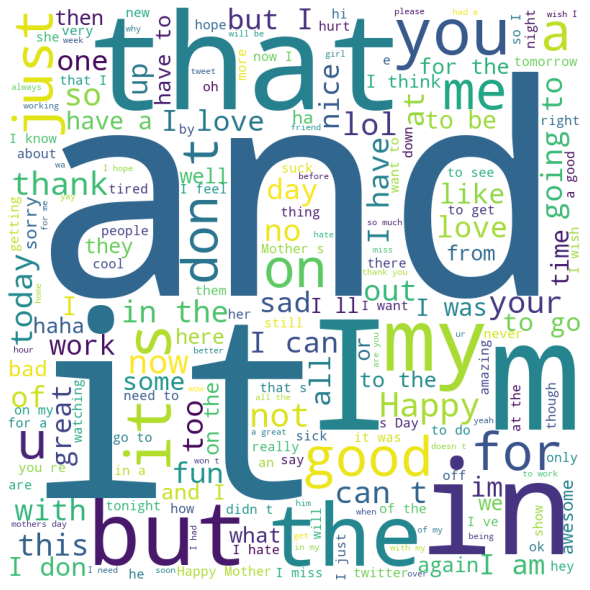

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = set(), min_font_size = 10).generate(' '.join(df['selected_text']))

# Generate the wordcloud and display it
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Show the plot
plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = set(), min_font_size = 10).generate(' '.join(df['selected_text']))

# Generate the wordcloud and display it
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Show the plot
plt.show()